# Task 4
Made by Roman Efremov, J41325c

## Convolutional Neural Network 



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [6]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16, ResNet50, VGG19
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [7]:
# Check tensrflow GPU supported

%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [8]:
# if you are using google colab for this task you can mount your GoogleDrive as follows: 
from google.colab import drive
drive.mount('/content/drive/')

# After running this cell you should enter the authorization code from your Google account

Mounted at /content/drive/


In [9]:
!cp /content/drive/MyDrive/ITMO_ML_Task4_Cats_and_Dogs_data.zip ./

In [10]:
!unzip -q ITMO_ML_Task4_Cats_and_Dogs_data.zip

In [11]:
!rm -r ITMO_ML_Task4_Cats_and_Dogs_data.zip

In [16]:
!cp /content/drive/MyDrive/cat_test1.jpg .
!cp /content/drive/MyDrive/dog_test1.png .

In [17]:
drive.flush_and_unmount()

In [18]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):
import os

dataset_dir_name = './Cats_and_Dogs'

train = os.path.join(dataset_dir_name, 'train')
val = os.path.join(dataset_dir_name, 'val')
test = os.path.join(dataset_dir_name, 'test')

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 20000
# validation set size 
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [19]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [57]:
model = Sequential()

layers_filters_sizes = [img_width, img_width // 2, img_width // 4]

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
# 2: +Pooling
model.add(MaxPooling2D())
# 3:
model.add(Conv2D(32, (3, 3)))
#     +Relu
model.add(Activation('relu'))
# 4:  +Pooling 
model.add(MaxPooling2D())
# 5:  +Convolutional
model.add(Conv2D(64, (3, 3)))
#     +Relu
model.add(Activation('relu'))
# 6:  +Pooling 
model.add(MaxPooling2D())
# 7:  +Flattening
model.add(Flatten())
# 8:  +Dense
model.add(Dense(64))
#     +ReLu
model.add(Activation('relu'))
# 9:  +Dropout
model.add(Dropout(0.5, seed=42))
# 10: +Dense
model.add(Dense(1))
#     +Sigmoid
model.add(Activation('sigmoid'))

In [58]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [59]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

def fit_model(m, epochs, initial_epoch=0):
    return model.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=epochs, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
            initial_epoch=initial_epoch,
            validation_data=val_generator,
            validation_steps=nb_validation_samples // batch_size)

In [60]:
def fit_model_and_estimate(mod_name, m, epochs, initial_epoch=0):
  print("Fitting model", mod_name)
  fit_res = fit_model(m, epochs, initial_epoch)  
  accuracy = m.evaluate_generator(test_generator, nb_test_samples // batch_size)[1]
  print("Accuracy of model", mod_name, "is =", accuracy)
  file_name = mod_name + "_ep_" + str(initial_epoch) + "_to_" + str(epochs) + ".model"
  m.save(file_name)
  print("Saved to", file_name)
  return fit_res, accuracy, file_name

In [61]:
results_10_epoch = fit_model_and_estimate("mod_10_epoch", model, 10, 0)

Fitting model mod_10_epoch
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


312/312 [==============================] - 60s 190ms/step - loss: 0.6810 - accuracy: 0.5699 - val_loss: 0.5424 - val_accuracy: 0.7278
Epoch 2/10
312/312 [==============================] - 59s 188ms/step - loss: 0.5440 - accuracy: 0.7246 - val_loss: 0.4923 - val_accuracy: 0.7595
Epoch 3/10
312/312 [==============================] - 59s 189ms/step - loss: 0.4714 - accuracy: 0.7792 - val_loss: 0.4666 - val_accuracy: 0.7812
Epoch 4/10
312/312 [==============================] - 59s 189ms/step - loss: 0.4184 - accuracy: 0.8049 - val_loss: 0.4151 - val_accuracy: 0.8080
Epoch 5/10
312/312 [==============================] - 59s 189ms/step - loss: 0.3864 - accuracy: 0.8305 - val_loss: 0.4231 - val_accuracy: 0.8109
Epoch 6/10
312/312 [==============================] - 59s 190ms/step - loss: 0.3479 - accuracy: 0.8477 - val_loss: 0.3974 - val_accuracy: 0.8211
Epoch 7/10
312/312 [==============================] - 59s 189ms/step - loss: 0.3087 - accuracy: 0.8683 - val_loss: 0.3943 - val_accuracy: 0.8

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy of model mod_10_epoch is = 0.8349359035491943
INFO:tensorflow:Assets written to: mod_10_epoch_ep_0_to_10.model/assets
Saved to mod_10_epoch_ep_0_to_10.model


In [62]:
results_15_epoch = fit_model_and_estimate("mod_15_epoch", model, 15, 10)

Fitting model mod_15_epoch
Epoch 11/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


312/312 [==============================] - 59s 189ms/step - loss: 0.1851 - accuracy: 0.9212 - val_loss: 0.4448 - val_accuracy: 0.8384
Epoch 12/15
312/312 [==============================] - 58s 187ms/step - loss: 0.1636 - accuracy: 0.9326 - val_loss: 0.5124 - val_accuracy: 0.8314
Epoch 13/15
312/312 [==============================] - 59s 188ms/step - loss: 0.1449 - accuracy: 0.9387 - val_loss: 0.5701 - val_accuracy: 0.8281
Epoch 14/15
312/312 [==============================] - 58s 187ms/step - loss: 0.1324 - accuracy: 0.9432 - val_loss: 0.5221 - val_accuracy: 0.8368
Epoch 15/15
312/312 [==============================] - 59s 188ms/step - loss: 0.1210 - accuracy: 0.9485 - val_loss: 0.6063 - val_accuracy: 0.8363


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy of model mod_15_epoch is = 0.8433493375778198
INFO:tensorflow:Assets written to: mod_15_epoch_ep_10_to_15.model/assets
Saved to mod_15_epoch_ep_10_to_15.model


In [63]:
results_20_epoch = fit_model_and_estimate("mod_20_epoch", model, 20, 15)

Fitting model mod_20_epoch
Epoch 16/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


312/312 [==============================] - 59s 188ms/step - loss: 0.1101 - accuracy: 0.9509 - val_loss: 0.5889 - val_accuracy: 0.8310
Epoch 17/20
312/312 [==============================] - 58s 187ms/step - loss: 0.1083 - accuracy: 0.9529 - val_loss: 0.5948 - val_accuracy: 0.8351
Epoch 18/20
312/312 [==============================] - 58s 185ms/step - loss: 0.0956 - accuracy: 0.9583 - val_loss: 0.6818 - val_accuracy: 0.8314
Epoch 19/20
312/312 [==============================] - 58s 185ms/step - loss: 0.0906 - accuracy: 0.9607 - val_loss: 0.7596 - val_accuracy: 0.8232
Epoch 20/20
312/312 [==============================] - 58s 185ms/step - loss: 0.0877 - accuracy: 0.9608 - val_loss: 0.6077 - val_accuracy: 0.8302


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy of model mod_20_epoch is = 0.8345352411270142
INFO:tensorflow:Assets written to: mod_20_epoch_ep_15_to_20.model/assets
Saved to mod_20_epoch_ep_15_to_20.model


In [66]:
import matplotlib.pyplot as plt

losses = []
accuracies = []
val_losses = []
val_accuracies = []

for res in [results_10_epoch, results_15_epoch, results_20_epoch]:
    res = res[0]
    losses.extend(res.history['loss'])
    accuracies.extend(res.history['accuracy'])
    val_losses.extend(res.history['val_loss'])
    val_accuracies.extend(res.history['val_accuracy'])

Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

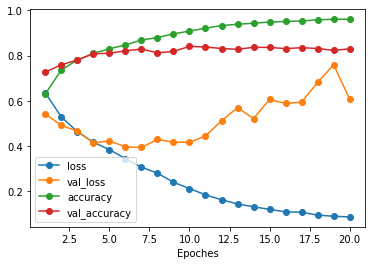

In [67]:
epoches = range(1, 21)
plt.plot(epoches, losses, 'o-', label='loss')
plt.plot(epoches, val_losses, 'o-', label='val_loss')
plt.plot(epoches, accuracies, 'o-', label='accuracy')
plt.plot(epoches, val_accuracies, 'o-', label='val_accuracy')
plt.xlabel("Epoches")
plt.legend()

## Conlclusions

We can conclude that model trained during 15 epoches is the best one in terms of accuracy, while 10 epochs is not enough (model is underfitted) and 20 epochs is too much (model is overfitted).

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('/content/drive/My Drive/Deeper.jpeg')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()


FileNotFoundError: ignored

Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [20]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [22]:
def add_layers_to_model(m):
    model = Sequential()
    model.add(m)

    # + flattening
    model.add(Flatten())
    # + Dense fullyconnected layer with 256 neurons
    model.add(Dense(256))
    # + ReLu
    model.add(Activation('relu'))
    # + Dropout
    model.add(Dropout(0.5, seed=42))
    # + Dense layer with 1 neuron
    model.add(Dense(1))
    # + sigmoid
    model.add(Activation('sigmoid'))
    return model


In [23]:
# add layers to VGG16:
vgg16_based_model = add_layers_to_model(vgg16_net)
vgg16_based_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0

In [24]:
vgg16_based_model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

E.g., it was like:


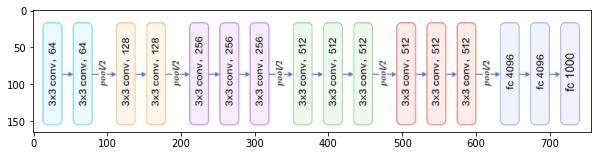

In [ ]:
img = mpimg.imread('/content/drive/My Drive/VGG16.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

and it becomes:

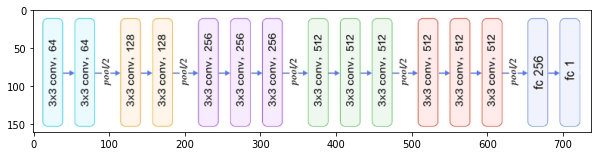

In [ ]:
img = mpimg.imread('/content/drive/My Drive/VGG162.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

In [25]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.


def train_model(m):
    return m.fit_generator(
                    train_generator,
                    steps_per_epoch=nb_train_samples // batch_size,
                    epochs=5,
                    validation_data=val_generator,
                    validation_steps=nb_validation_samples // batch_size)

In [26]:
vgg19_net = VGG19(include_top=False, input_shape=(150, 150, 3))
vgg19_net.trainable = False
vgg19_based_model = add_layers_to_model(vgg19_net)
vgg19_based_model.summary()

80142336/80134624 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
_______________________________________________________

In [27]:
vgg19_based_model.compile(loss='binary_crossentropy',
                              optimizer=Adam(lr=1e-5), 
                              metrics=['accuracy'])

In [28]:
task2_models = [("VGG16", vgg16_based_model), ("VGG19", vgg19_based_model)]
task2_models_train_results = []


for mod_base_name, m in task2_models:
    print("Training model based on", mod_base_name)
    res = train_model(m)
    task2_models_train_results.append(res)
    file_name = mod_base_name + "_based.model"
    m.save(file_name)
    print("Saved into", file_name, "\n")


Training model based on VGG16


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
312/312 [==============================] - 81s 231ms/step - loss: 0.6089 - accuracy: 0.6531 - val_loss: 0.3546 - val_accuracy: 0.8590
Epoch 2/5
312/312 [==============================] - 71s 229ms/step - loss: 0.3625 - accuracy: 0.8430 - val_loss: 0.2963 - val_accuracy: 0.8836
Epoch 3/5
312/312 [==============================] - 72s 230ms/step - loss: 0.3043 - accuracy: 0.8707 - val_loss: 0.2711 - val_accuracy: 0.8964
Epoch 4/5
312/312 [==============================] - 72s 230ms/step - loss: 0.2768 - accuracy: 0.8828 - val_loss: 0.2570 - val_accuracy: 0.8968
Epoch 5/5
312/312 [==============================] - 72s 229ms/step - loss: 0.2565 - accuracy: 0.8932 - val_loss: 0.2477 - val_accuracy: 0.9050
INFO:tensorflow:Assets written to: VGG16_based.model/assets
Saved into VGG16_based.model 

Training model based on VGG19
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


312/312 [==============================] - 77s 245ms/step - loss: 0.6639 - accuracy: 0.6247 - val_loss: 0.3904 - val_accuracy: 0.8421
Epoch 2/5
312/312 [==============================] - 75s 239ms/step - loss: 0.3926 - accuracy: 0.8278 - val_loss: 0.3295 - val_accuracy: 0.8672
Epoch 3/5
312/312 [==============================] - 75s 239ms/step - loss: 0.3381 - accuracy: 0.8571 - val_loss: 0.3057 - val_accuracy: 0.8738
Epoch 4/5
312/312 [==============================] - 74s 238ms/step - loss: 0.3104 - accuracy: 0.8651 - val_loss: 0.2921 - val_accuracy: 0.8828
Epoch 5/5
312/312 [==============================] - 75s 239ms/step - loss: 0.2857 - accuracy: 0.8801 - val_loss: 0.2824 - val_accuracy: 0.8828
INFO:tensorflow:Assets written to: VGG19_based.model/assets
Saved into VGG19_based.model 



In [32]:
# Function for the inference of the best algorithm
def find_best_algorithm(trained_models):
  best_accuracy = None
  best_model = None

  for mod_base_name, m in trained_models:
    accuracy = m.evaluate_generator(test_generator, nb_test_samples // batch_size)[1]
    print("Estimated test accuracy of", mod_base_name, "=", accuracy)

    if best_accuracy is None or best_accuracy < accuracy:
      best_accuracy = accuracy
      best_model = (mod_base_name, m)
      
  return best_model

In [33]:
best_mod = find_best_algorithm(task2_models)
print("Best is", best_mod[0])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Estimated test accuracy of VGG16 = 0.8894230723381042
Estimated test accuracy of VGG19 = 0.8729968070983887
Best is VGG16


Text(0.5, 0, 'Epoch')

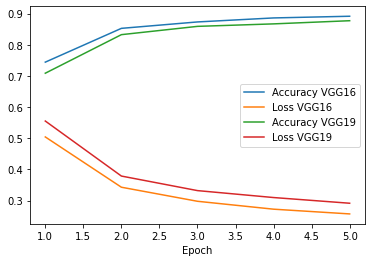

In [37]:
import matplotlib.pyplot as plt

for i, train_result in enumerate(task2_models_train_results):
  model_name = task2_models[i][0]
  eps = range(1, 6)
  plt.plot(eps, train_result.history['accuracy'], label='Accuracy ' + model_name)
  plt.plot(eps, train_result.history['loss'], label='Loss ' + model_name)
plt.legend()
plt.xlabel('Epoch')

In [38]:
! ls

Cats_and_Dogs  dog_test1.png  VGG16_based.model
cat_test1.jpg  sample_data    VGG19_based.model


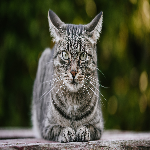

In [46]:
cat_test_img = tf.keras.preprocessing.image.load_img('cat_test1.jpg', target_size=(150, 150))
cat_test_img

In [42]:
import keras

In [47]:
cat_test_img_arr = keras.preprocessing.image.img_to_array(cat_test_img)

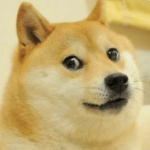

In [48]:
dog_test_img = tf.keras.preprocessing.image.load_img('dog_test1.png', target_size=(150, 150))
dog_test_img

In [49]:
dog_test_img_arr = keras.preprocessing.image.img_to_array(dog_test_img)

In [52]:
dog_test_img_arr.shape

(150, 150, 3)

In [53]:
import numpy as np
test_data = np.array([cat_test_img_arr, dog_test_img_arr])

In [62]:
for mod_name, mod in task2_models:
  preds = mod.predict(test_data) > 0.5
  print(preds)

[[False]
 [ True]]
[[False]
 [ True]]



We can see that both models correctly predicted two image classes. But on test data the model based on VGG19 showed less accuracy.